In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
results = pd.read_csv('results_ECG.csv', sep=",")

targets = pd.read_csv('results_ECG.csv', sep=",")

In [5]:
display(list(results.columns.values))

['transient',
 'rhos',
 'reg',
 'lis',
 'iss',
 'con',
 'Nr',
 'Nl',
 '.sampling',
 'MSE',
 'outputs',
 'MSE_std',
 'outputs_std']

In [31]:
outputs = np.array(results["outputs"])
#single = outputs[1000].split(',')

out_mat = []
for out in outputs:
    single = out.split(',')
    arr = []

    for i in range(len(single)):
        if i == 0:
            arr.append(float(single[i][1:len(single[i])]))
        elif i == len(single)-1:
            arr.append(float(single[i][0:(len(single[i])-1)]))
        else:
            arr.append(float(single[i]))

    out_mat.append(arr)

#print(arr, "\n\n")

In [34]:
outputs_std = np.array(results["outputs_std"])

out_std_mat = []
for out in outputs_std:
    single = out.split(',')
    arr = []

    for i in range(len(single)):
        if i == 0:
            arr.append(float(single[i][1:len(single[i])]))
        elif i == len(single)-1:
            arr.append(float(single[i][0:(len(single[i])-1)]))
        else:
            arr.append(float(single[i]))

    out_std_mat.append(arr)

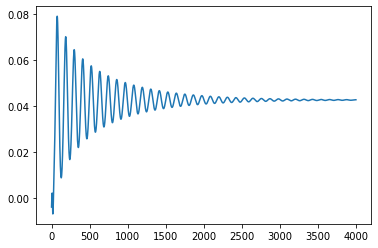

In [32]:
plt.plot(out_mat[1000])
plt.show()

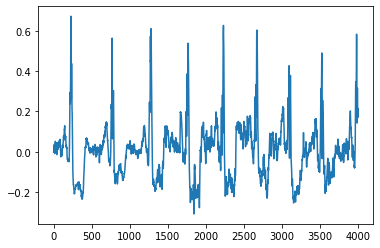

In [40]:
plt.plot(out_std_mat[1000])
plt.show()